<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,78.701630,89.508192,64.703608,78.982648,-21.979728,299.916349,328.735514,-28.819164
1,0.0,1.0,32.646590,43.789188,36.288841,47.087255,-0.058064,169.753810,164.252332,5.501478
2,0.0,2.0,24.333742,95.337701,60.275596,59.309502,2.509779,251.766320,254.422638,-2.656318
3,0.0,3.0,74.531366,59.180860,96.545990,22.282490,3.359626,265.900331,264.587612,1.312720
4,0.0,4.0,96.490676,83.729936,69.218431,53.919028,12.575601,325.933673,318.124243,7.809430
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,86.796376,56.619032,86.459395,90.613701,-0.206358,330.282146,330.163643,0.118503
29996,999.0,26.0,52.409312,46.045525,86.776876,22.965590,6.652074,224.849376,216.521747,8.327630
29997,999.0,27.0,52.470739,28.660637,38.573664,91.800206,4.686669,226.191915,222.306220,3.885696
29998,999.0,28.0,54.933874,41.534188,20.964951,98.824385,2.385375,228.642773,228.182600,0.460173


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    78.701630  89.508192  64.703608  78.982648 -21.979728   
      1.0    32.646590  43.789188  36.288841  47.087255  -0.058064   
      2.0    24.333742  95.337701  60.275596  59.309502   2.509779   
      3.0    74.531366  59.180860  96.545990  22.282490   3.359626   
      4.0    96.490676  83.729936  69.218431  53.919028  12.575601   
...                ...        ...        ...        ...        ...   
999.0 25.0   86.796376  56.619032  86.459395  90.613701  -0.206358   
      26.0   52.409312  46.045525  86.776876  22.965590   6.652074   
      27.0   52.470739  28.660637  38.573664  91.800206   4.686669   
      28.0   54.933874  41.534188  20.964951  98.824385   2.385375   
      29.0   42.576278  92.477866  25.455947  95.804590   9.696490   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    299.916349  328.735514 -28.819164  
      1.0    169.753810  164.252332   5.501478  
      2.0    251.766320  254.422638  -2.656318  
      3.0    265.900331  264.587612   1.312720  
      4.0    325.933673  318.124243   7.809430  
...                 ...         ...        ...  
999.0 25.0   330.282146  330.163643   0.118503  
      26.0   224.849376  216.521747   8.327630  
      27.0   226.191915  222.306220   3.885696  
      28.0   228.642773  228.182600   0.460173  
      29.0   276.011172  271.190014   4.821157  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    78.701630  89.508192  64.703608  78.982648 -21.979728   
      1.0    32.646590  43.789188  36.288841  47.087255  -0.058064   
      2.0    24.333742  95.337701  60.275596  59.309502   2.509779   
      3.0    74.531366  59.180860  96.545990  22.282490   3.359626   
      4.0    96.490676  83.729936  69.218431  53.919028  12.575601   
...                ...        ...        ...        ...        ...   
999.0 25.0   86.796376  56.619032  86.459395  90.613701  -0.206358   
      26.0   52.409312  46.045525  86.776876  22.965590   6.652074   
      27.0   52.470739  28.660637  38.573664  91.800206   4.686669   
      28.0   54.933874  41.534188  20.964951  98.824385   2.385375   
      29.0   42.576278  92.477866  25.455947  95.804590   9.696490   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    299.916349  328.735514 -28.819164  
      1.0    169.753810  164.252332   5.501478  
      2.0    251.766320  254.422638  -2.656318  
      3.0    265.900331  264.587612   1.312720  
      4.0    325.933673  318.124243   7.809430  
...                 ...         ...        ...  
999.0 25.0   330.282146  330.163643   0.118503  
      26.0   224.849376  216.521747   8.327630  
      27.0   226.191915  222.306220   3.885696  
      28.0   228.642773  228.182600   0.460173  
      29.0   276.011172  271.190014   4.821157  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,78.701630,89.508192,64.703608,78.982648,-21.979728,299.916349,328.735514,-28.819164
1,0.0,1.0,32.646590,43.789188,36.288841,47.087255,-0.058064,169.753810,164.252332,5.501478
2,0.0,2.0,24.333742,95.337701,60.275596,59.309502,2.509779,251.766320,254.422638,-2.656318
3,0.0,3.0,74.531366,59.180860,96.545990,22.282490,3.359626,265.900331,264.587612,1.312720
4,0.0,4.0,96.490676,83.729936,69.218431,53.919028,12.575601,325.933673,318.124243,7.809430
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,86.796376,56.619032,86.459395,90.613701,-0.206358,330.282146,330.163643,0.118503
29996,999.0,26.0,52.409312,46.045525,86.776876,22.965590,6.652074,224.849376,216.521747,8.327630
29997,999.0,27.0,52.470739,28.660637,38.573664,91.800206,4.686669,226.191915,222.306220,3.885696
29998,999.0,28.0,54.933874,41.534188,20.964951,98.824385,2.385375,228.642773,228.182600,0.460173


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    78.701630  89.508192  64.703608  78.982648 -21.979728   
      1.0    32.646590  43.789188  36.288841  47.087255  -0.058064   
      2.0    24.333742  95.337701  60.275596  59.309502   2.509779   
      3.0    74.531366  59.180860  96.545990  22.282490   3.359626   
      4.0    96.490676  83.729936  69.218431  53.919028  12.575601   
...                ...        ...        ...        ...        ...   
999.0 25.0   86.796376  56.619032  86.459395  90.613701  -0.206358   
      26.0   52.409312  46.045525  86.776876  22.965590   6.652074   
      27.0   52.470739  28.660637  38.573664  91.800206   4.686669   
      28.0   54.933874  41.534188  20.964951  98.824385   2.385375   
      29.0   42.576278  92.477866  25.455947  95.804590   9.696490   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    299.916349  328.735514 -28.819164  
      1.0    169.753810  164.252332   5.501478  
      2.0    251.766320  254.422638  -2.656318  
      3.0    265.900331  264.587612   1.312720  
      4.0    325.933673  318.124243   7.809430  
...                 ...         ...        ...  
999.0 25.0   330.282146  330.163643   0.118503  
      26.0   224.849376  216.521747   8.327630  
      27.0   226.191915  222.306220   3.885696  
      28.0   228.642773  228.182600   0.460173  
      29.0   276.011172  271.190014   4.821157  

[30000 rows x 8 columns]

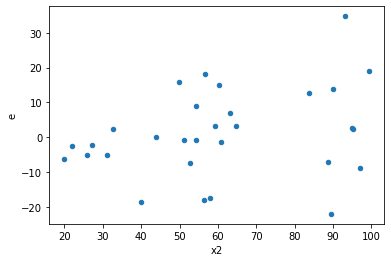

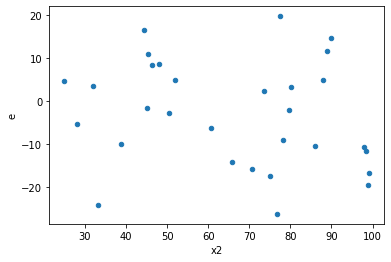

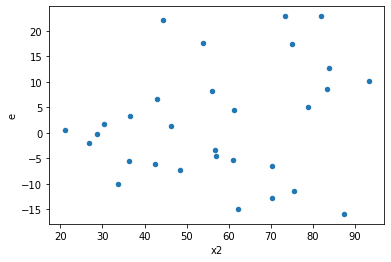

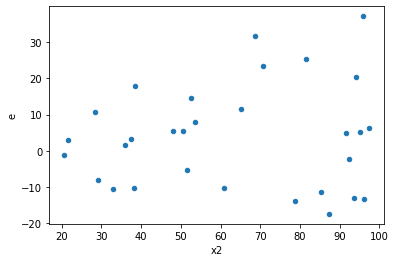

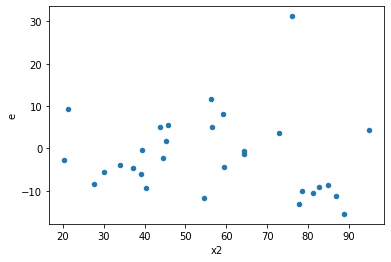

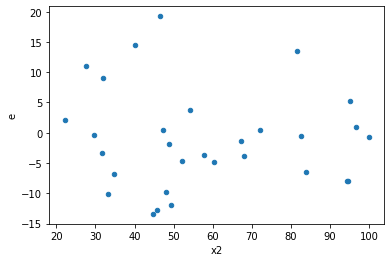

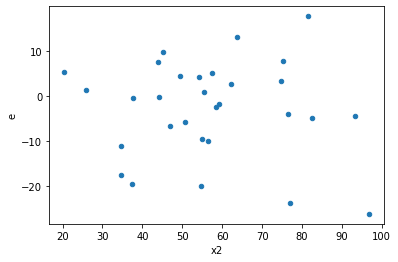

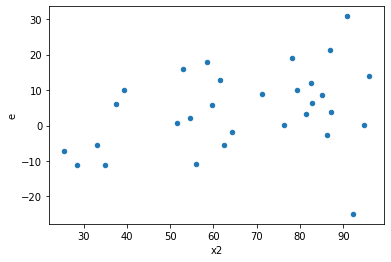

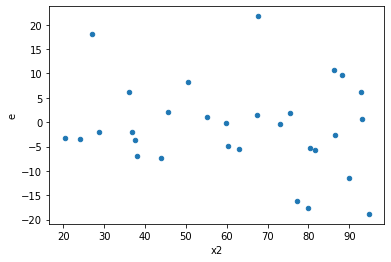

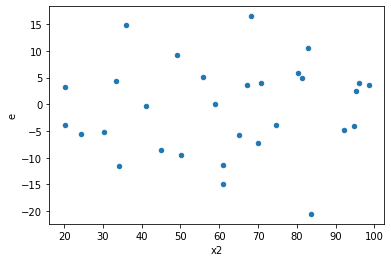

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,12.0,14.0,6938.025558384735,8479.955745067136,578.1687965320613,605.7111246476526,1.0476371749578914,0.9231145963411631,0.5384427018294184,0.46155729817058155,Reject001=1 : Homoscedasticity
3.0,15.0,11.0,10682.641908829533,15331.996312029543,712.1761272553023,1393.8178465481403,1.9571252014861231,0.2649761153541046,0.8675119423229477,0.1324880576770523,Reject001=1 : Homoscedasticity
8.0,12.0,14.0,6843.99369338326,10114.16235605724,570.3328077819383,722.440168289803,1.2666992998341093,0.6657218937067082,0.6671390531466459,0.3328609468533541,Reject001=1 : Homoscedasticity
12.0,17.0,9.0,8720.4202739423,8097.4071828811975,512.9658984671942,899.711909209022,1.7539409771633416,0.393587719966487,0.8032061400167565,0.1967938599832435,Reject001=1 : Homoscedasticity
13.0,8.0,18.0,2159.7981598187084,12184.900869199242,269.97476997733855,676.9389371777356,2.507415553070227,0.10039482072258954,0.9498025896387052,0.05019741036129477,Reject001=1 : Homoscedasticity
16.0,19.0,7.0,8649.739959845321,4624.842439408533,455.2494715708064,660.6917770583619,1.4512741218099414,0.6394326269099864,0.6802836865450068,0.3197163134549932,Reject001=1 : Homoscedasticity
18.0,9.0,17.0,5499.061969241222,10957.396543460276,611.0068854712468,644.5527378506044,1.0549025766763414,0.8803331103717587,0.5598334448141207,0.4401665551858793,Reject001=1 : Homoscedasticity
19.0,17.0,9.0,6663.128354199622,6959.658120540489,391.9487267176248,773.295346726721,1.972950271334427,0.30040553390400015,0.8497972330479999,0.15020276695200008,Reject001=1 : Homoscedasticity
24.0,10.0,16.0,8477.86991092302,14685.170192732881,847.7869910923021,917.8231370458051,1.0826105456787765,0.8561783215832894,0.5719108392083553,0.4280891607916447,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,18.0,8.0,15887.605355830914,4499.021131010476,882.6447419906063,562.3776413763095,0.6371506163487627,0.4056926511522278,Reject001=1 : Homoscedasticity
1.0,13.0,13.0,5921.605800389357,5679.877206101655,455.508138491489,436.9136312385889,0.95917854000484,0.9412460568697371,Reject001=1 : Homoscedasticity
2.0,12.0,14.0,6938.025558384735,8479.955745067136,578.1687965320613,605.7111246476526,1.0476371749578914,0.9231145963411631,Reject001=1 : Homoscedasticity
3.0,15.0,11.0,10682.641908829533,15331.996312029543,712.1761272553023,1393.8178465481403,1.9571252014861231,0.2649761153541046,Reject001=1 : Homoscedasticity
4.0,18.0,8.0,13573.177335288963,4021.725659819814,754.0654075160535,502.71570747747677,0.6666738753252971,0.45068561207520824,Reject001=1 : Homoscedasticity
5.0,20.0,6.0,15111.615031962552,3916.52619459205,755.5807515981276,652.7543657653417,0.8639107923073769,0.734091296992996,Reject001=1 : Homoscedasticity
6.0,18.0,8.0,10050.879633241528,3531.5696981442893,558.3822018467515,441.44621226803616,0.7905807362914327,0.6409337501667947,Reject001=1 : Homoscedasticity
7.0,15.0,11.0,9566.40812360095,3682.672912594552,637.7605415733966,334.78844659950477,0.5249438069240846,0.24439607635273283,Reject001=1 : Homoscedasticity
8.0,12.0,14.0,6843.99369338326,10114.16235605724,570.3328077819383,722.440168289803,1.2666992998341093,0.6657218937067082,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      975
Reject001=0 : Heteroscedasticity     25
Name: Result_test, dtype: int64